In [ ]:
import numpy as np
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

Given set of ODEs are,

$$\frac{dCa}{dt} \,=\, c1\,.\,v1\,.\,p_{\infty}^{3}\,.\,n_{\infty}^{3}\,.\,h^3\,.\,(Ca_{ER}-Ca) \,+\, c1\,.\,v2\,.\,(Ca_{ER}-Ca) \,-\, v3\,.\,\frac{Ca^2}{Ca^2 + k3^2} $$
$$\frac{dh}{dt}\, = \, \alpha_h(1-h)\,-\, \beta_h\,.\,h$$

The initial conditions are,

$$Ca(t=0) = 0.1$$
$$h(t=0) = 0.1$$

The constant Parameters are,

$c0,\, c1,\, v1,\, v2,\, v3,\, d1,\, d2,\, d3,\, d5,\, a2,\, k3,\, IP3$

The other parameters are,

$$CaER = \frac{c0 - Ca}{c1}$$
$$p_{\infty} = \frac{IP3}{IP3 + d1}$$
$$n_{\infty} = \frac{Ca}{Ca + d5}$$
$$Q_2 = d2 \left(\frac{IP3+d1}{IP3+d3}\right)$$
$$\tau_h = \frac{1}{a2(Q2+Ca)}$$
$$h_{\infty} = \frac{Q2}{Q2+Ca}$$
$$\alpha_h = \frac{h_{\infty}}{\tau_h}$$
$$\beta_h = \frac{1 - h_{\infty}}{\tau_h}$$

In [2]:
def normalisation(k_Ca):
    max_Ca = np.max(k_Ca)
    return k_Ca / max_Ca

def lirinzel_ns(v2, a2, IP3, d5, k3, dt):
    c0, c1 = 2, 0.185
    v1, v3 = 6, 0.9
    d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
    time = np.arange(0, 1, dt)
    dt = dt
    Ca, h = [0.1], [0.1]  # Initialize lists

    # ODE solving
    for _ in range(1, len(time)):  # Start from index 1 to avoid index errors
        CaER = (c0 - Ca[-1]) / c1
        pinf = IP3 / (IP3 + d1)
        ninf = Ca[-1] / (Ca[-1] + d5)
        Q2 = d2 * (IP3 + d1) / (IP3 + d3)
        tauh = 1 / (a2 * (Q2 + Ca[-1]))
        hinf = Q2 / (Q2 + Ca[-1])
        alphah = hinf / tauh
        betah = (1 - hinf) / tauh
        dh = alphah * (1 - h[-1]) - betah * h[-1]
        dCa = (c1 * v1 * pinf**3 * ninf**3 * h[-1]**3 * (CaER - Ca[-1]) +
               c1 * v2 * (CaER - Ca[-1]) -
               v3 * Ca[-1]**2 / (Ca[-1]**2 + k3**2))
        
        # Append new values instead of assigning to an index
        Ca.append(Ca[-1] + dCa * dt)
        h.append(h[-1] + dh * dt)

    # Convert to NumPy array for interpolation
    Ca = np.array(Ca)
    h = np.array(h)

    return Ca, h

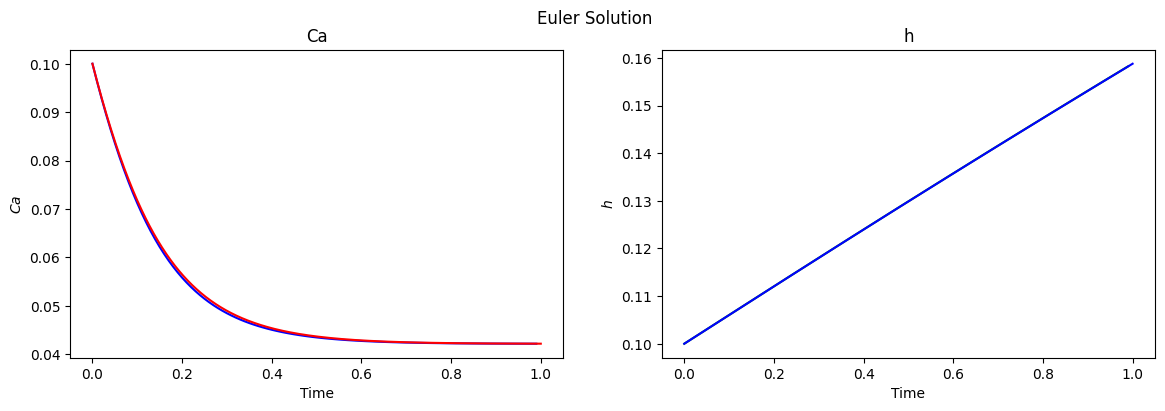

In [3]:
v2 = 0.1
a2 = 0.15
IP3 = 0.5
d5 = 0.09
k3  = 0.08

dt1 = 0.01
t1 = np.arange(0, 1, dt1)
Ca_euler1, h_euler1 = lirinzel_ns(v2, a2, IP3, d5, k3, dt1)

dt2 = 0.0001
t2 = np.arange(0, 1, dt2)
Ca_euler2, h_euler2 = lirinzel_ns(v2, a2, IP3, d5, k3, dt2)

plt.figure(figsize=(14,4))
plt.suptitle("Euler Solution")

plt.subplot(121)
plt.plot(t1, Ca_euler1, 'b')
plt.plot(t2, Ca_euler2, 'r')
plt.xlabel("Time")
plt.ylabel("$Ca$")
plt.title("Ca")

plt.subplot(122)
plt.plot(t1, h_euler1, 'g')
plt.plot(t2, h_euler2, 'b')
plt.xlabel("Time")
plt.ylabel("$h$")
plt.title("h")
plt.show()

In [4]:
class PinnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=30)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=30, out_features=30)
        self.layer3 = nn.Linear(in_features=30, out_features=30)
        self.layer4 = nn.Linear(in_features=30, out_features=2)

    def forward(self, x):
        return self.layer4(self.tanh(self.layer3(self.tanh(self.layer2(self.tanh(self.layer1(x)))))))

Training step: 0
Loss = 0.0009688368299975991 | Physics_loss = 0.36944904923439026 | Initial_loss = 0.05993877351284027


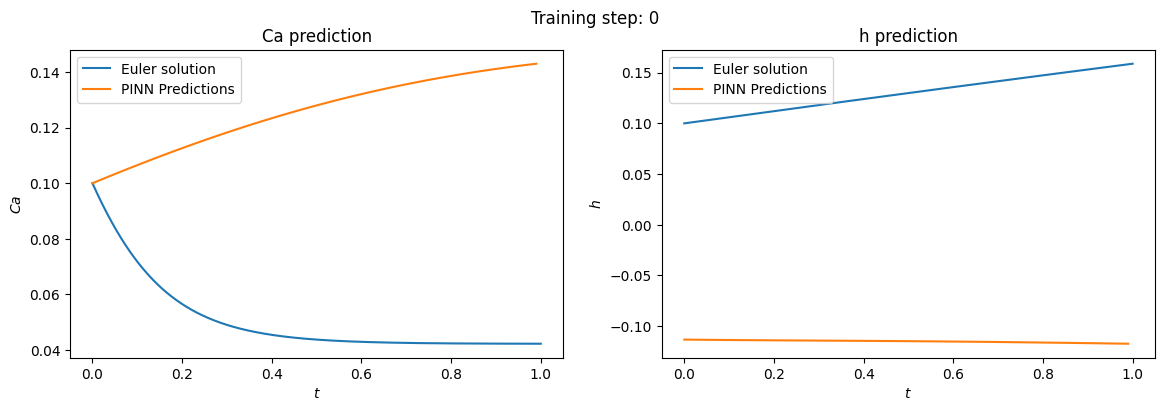

Training step: 1000
Loss = 7.947452900225471e-07 | Physics_loss = 0.0007835704600438476 | Initial_loss = 1.117476926992822e-06


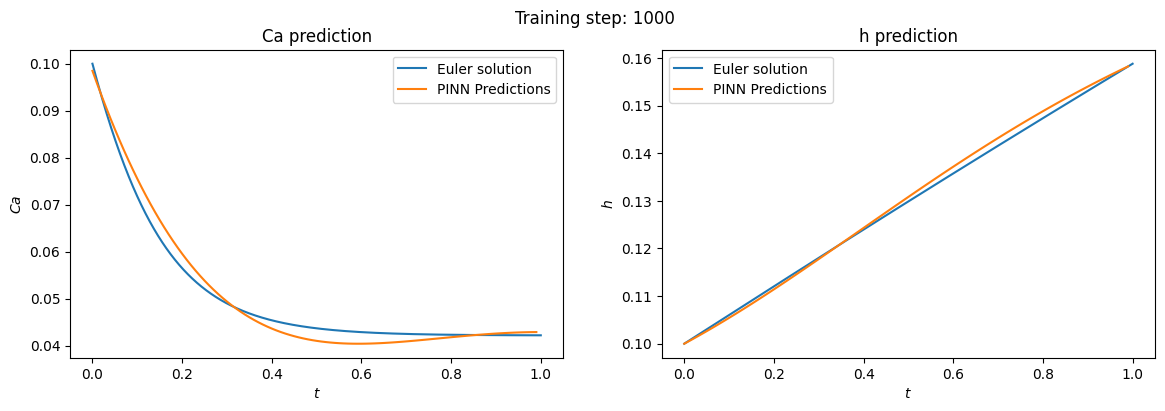

Training step: 2000
Loss = 3.427795434163272e-07 | Physics_loss = 0.00033884638105519116 | Initial_loss = 3.9331411016974016e-07


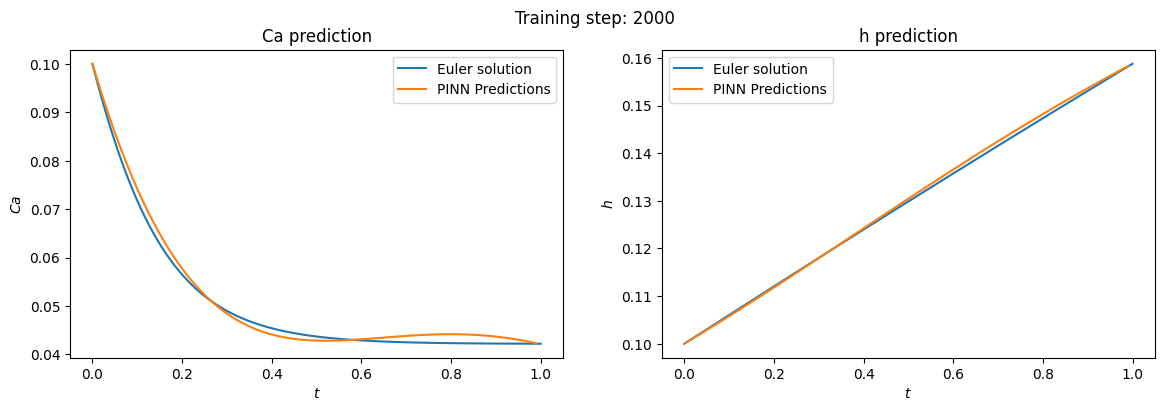

Training step: 3000
Loss = 5.165927632333478e-07 | Physics_loss = 0.0004797364235855639 | Initial_loss = 3.6856333736068336e-06


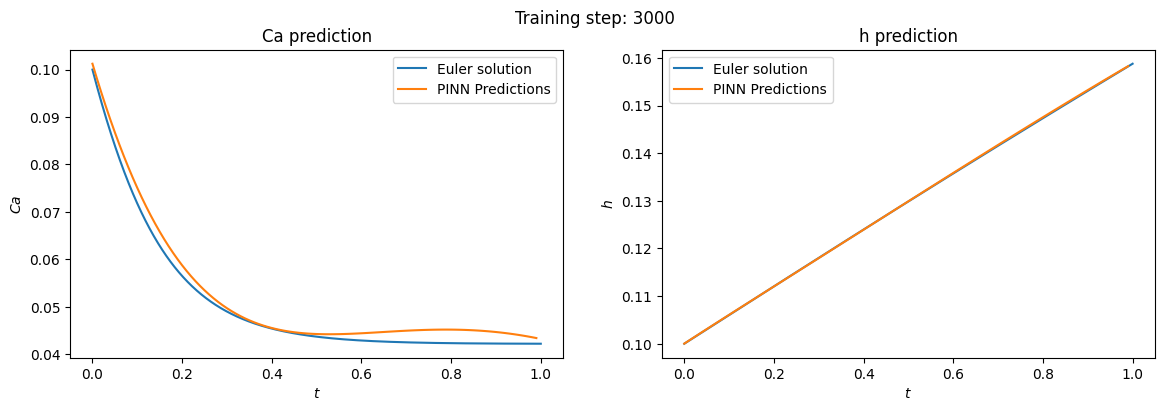

Training step: 4000
Loss = 1.5538293496319966e-07 | Physics_loss = 0.00015446549514308572 | Initial_loss = 9.17434732627953e-08


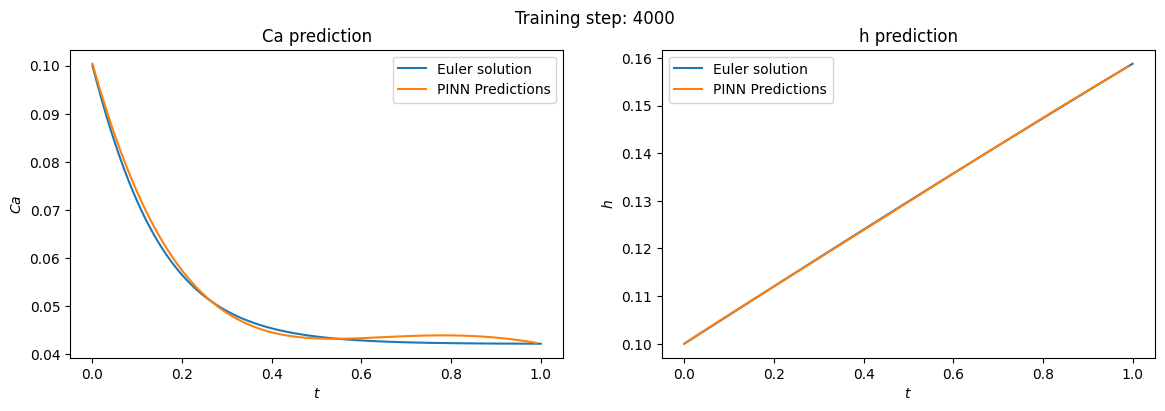

Training step: 5000
Loss = 8.470452428355202e-08 | Physics_loss = 8.467454608762637e-05 | Initial_loss = 2.9973976634067867e-09


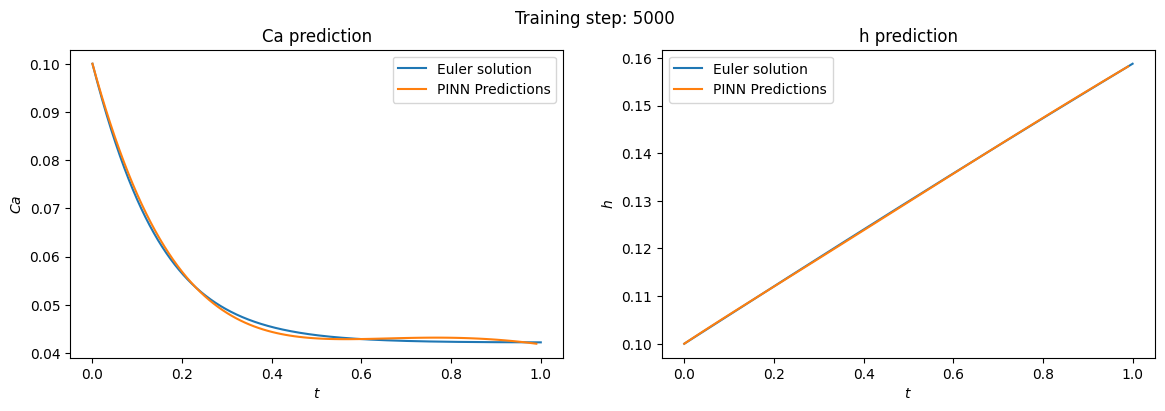

Training step: 6000
Loss = 3.378001878218129e-08 | Physics_loss = 3.377298708073795e-05 | Initial_loss = 7.031367710297332e-10


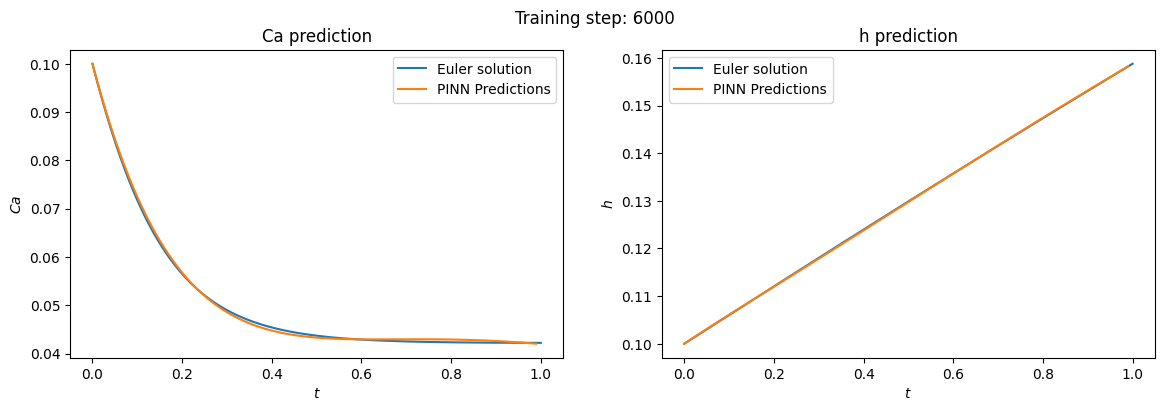

Training step: 7000
Loss = 1.0101643077575773e-08 | Physics_loss = 9.979162314266432e-06 | Initial_loss = 1.224805945554408e-08


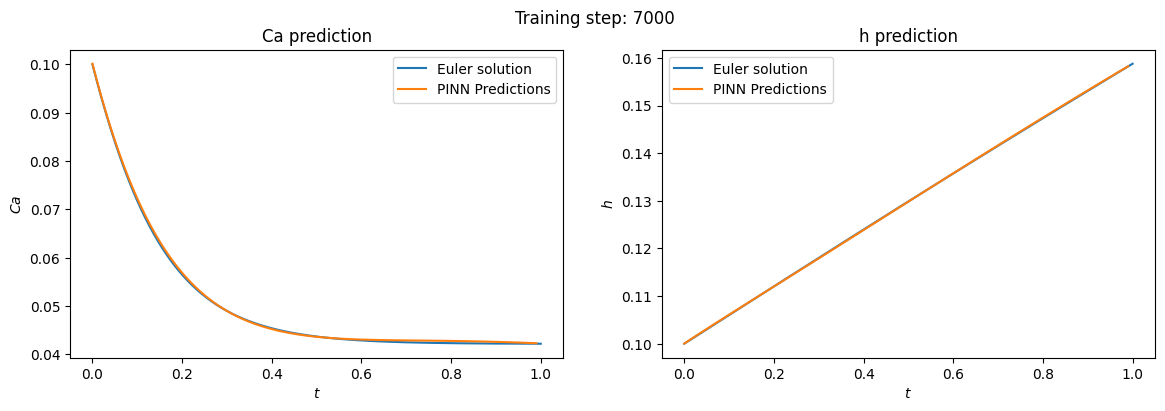

Training step: 8000
Loss = 5.313720130573074e-09 | Physics_loss = 5.300318662193604e-06 | Initial_loss = 1.3401373344379408e-09


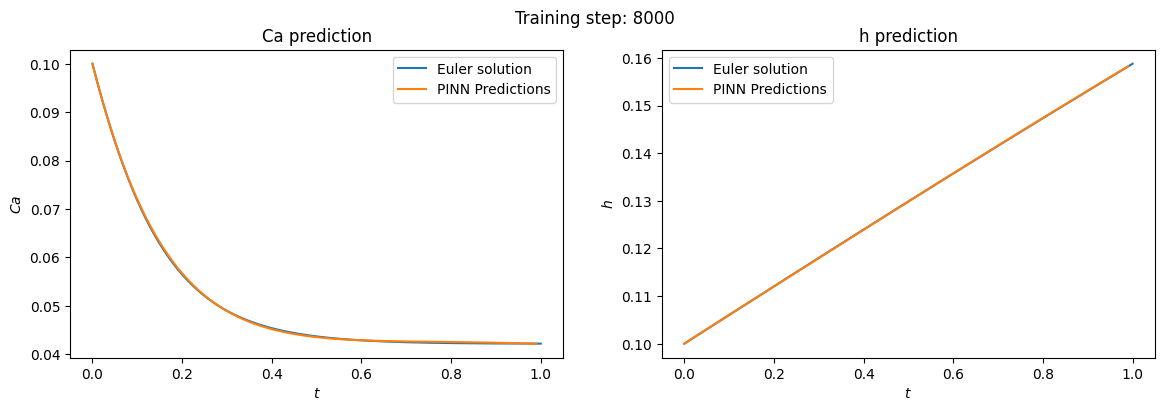

Training step: 9000
Loss = 3.56555562852634e-09 | Physics_loss = 3.564281087165e-06 | Initial_loss = 1.2742479293947895e-10


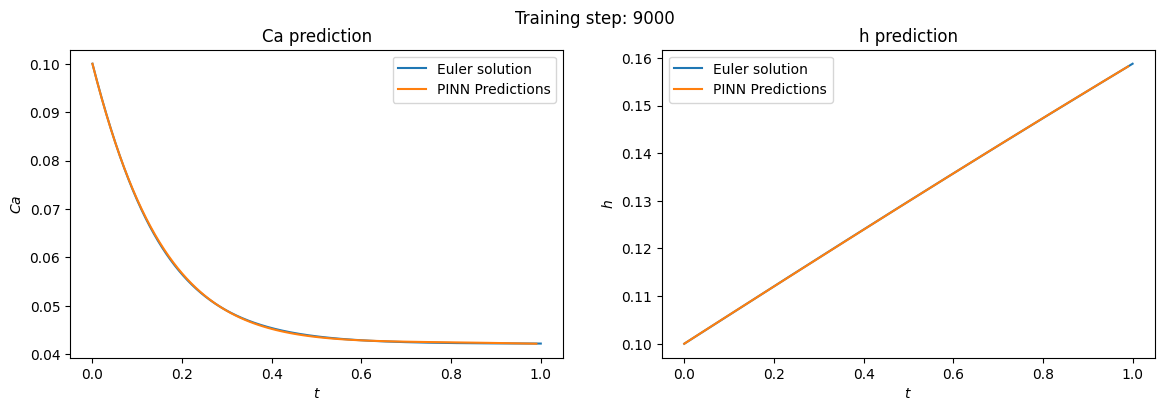

Training step: 10000
Loss = 2.843203450453302e-09 | Physics_loss = 2.8328745429462288e-06 | Initial_loss = 1.032888441443447e-09


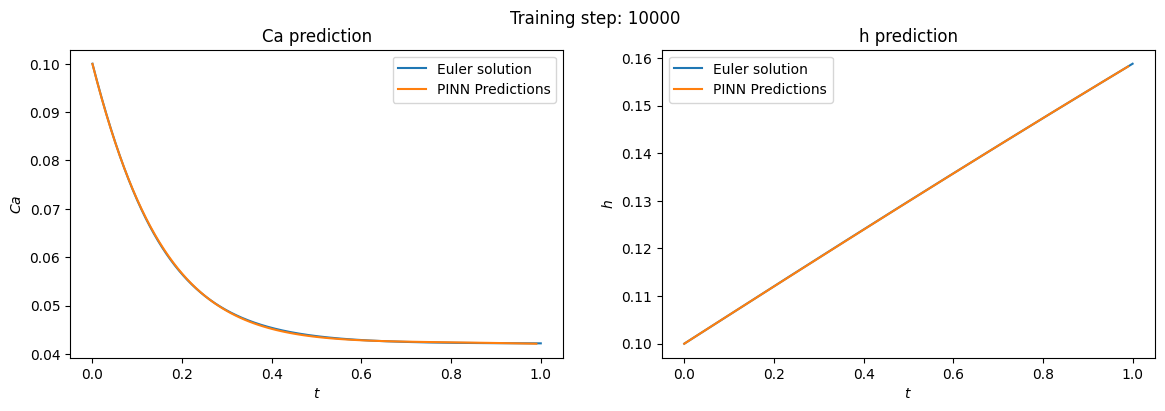

In [16]:
torch.manual_seed(42)
pinn = PinnModel()

time = torch.arange(0, 1, 0.01).view(-1, 1)
t_initial = torch.tensor(0.0, requires_grad=True).view(-1, 1)
t_physics = torch.linspace(0, 1, 50, requires_grad=True).view(-1, 1)

optimiser = torch.optim.Adam(pinn.parameters(), lr=0.001)
epochs = 10001

c0, c1 = 2, 0.185
v1, v3 = 6, 0.9
d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
v2 = 0.1
a2 = 0.15
IP3 = 0.5
d5 = 0.09
k3  = 0.08
pinf = IP3 / (IP3 + d1)
Q2 = d2 * (IP3 + d1) / (IP3 + d3)


for i in range(epochs):

    optimiser.zero_grad()

    # Initial loss
    Ca0, h0 = pinn(t_initial)[0]
    loss1 = (torch.squeeze(Ca0) - 0.1)**2
    loss2 = (torch.squeeze(h0) - 0.1)**2

    # Physics loss 
    Ca = pinn(t_physics)[:, 0].view(-1, 1)
    Ca_temp = Ca
    dCa_dt = torch.autograd.grad(Ca, t_physics, torch.ones_like(Ca), create_graph=True, retain_graph=True)[0]

    h = pinn(t_physics)[:, 1].view(-1, 1)
    h_temp = h
    dh_dt = torch.autograd.grad(h, t_physics, torch.ones_like(h), create_graph=True, retain_graph=True)[0]

    CaER = (c0 - Ca_temp) / c1
    ninf = Ca_temp / (Ca_temp + d5)
    tauh = 1 / (a2 * (Q2 + Ca_temp))
    hinf = Q2 / (Q2 + Ca_temp)
    alphah = hinf / tauh
    betah = (1 - hinf) / tauh

    loss3 = torch.mean((dCa_dt - (c1*v1*(pinf**3)*(ninf**3)*(h_temp**3)*(CaER - Ca_temp) + c1*v2*(CaER-Ca_temp) - v3*(Ca_temp**2 / (Ca_temp**2 + k3**2))))**2)
    loss4 = torch.mean((dh_dt - (alphah*(1-h_temp) - betah*h_temp))**2)


    # Total loss
    loss = 1e-2*(loss1 + loss2) + 1e-3*(loss3 + loss4)
    loss.backward()
    optimiser.step()

    if i % 1000 == 0:
        print(f"Training step: {i}")
        print(f"Loss = {loss} | Physics_loss = {loss3 + loss4} | Initial_loss = {loss1 + loss2}")

        sol = pinn(time)
        Ca_preds = sol[:, 0].view(-1, 1)
        h_preds = sol[:, 1].view(-1, 1)

        plt.figure(figsize=(14, 4))
        plt.suptitle(f"Training step: {i}")

        plt.subplot(121)
        plt.plot(t2, Ca_euler2, label="Euler solution")
        plt.plot(time.squeeze(), Ca_preds.detach(), label="PINN Predictions")
        plt.title("Ca prediction")
        plt.xlabel("$t$")
        plt.ylabel("$Ca$")
        plt.legend()

        plt.subplot(122)
        plt.plot(t2, h_euler2, label="Euler solution")
        plt.plot(time.squeeze(), h_preds.detach(), label="PINN Predictions")
        plt.title("h prediction")
        plt.xlabel("$t$")
        plt.ylabel("$h$")
        plt.legend()
        plt.show()

In [77]:
def normalisation(k_Ca):
    max_Ca = np.max(k_Ca)
    return k_Ca / max_Ca

def lirinzel_ns(v2, a2, IP3, d5, k3, dt):
    c0, c1 = 2, 0.185
    v1, v3 = 6, 0.9
    d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
    time = np.arange(0, 40, dt)
    dt = dt
    Ca, h = [0.1], [0.1]  # Initialize lists

    # ODE solving
    for _ in range(1, len(time)):  # Start from index 1 to avoid index errors
        CaER = (c0 - Ca[-1]) / c1
        pinf = IP3 / (IP3 + d1)
        ninf = Ca[-1] / (Ca[-1] + d5)
        Q2 = d2 * (IP3 + d1) / (IP3 + d3)
        tauh = 1 / (a2 * (Q2 + Ca[-1]))
        hinf = Q2 / (Q2 + Ca[-1])
        alphah = hinf / tauh
        betah = (1 - hinf) / tauh
        dh = alphah * (1 - h[-1]) - betah * h[-1]
        dCa = (c1 * v1 * pinf**3 * ninf**3 * h[-1]**3 * (CaER - Ca[-1]) +
               c1 * v2 * (CaER - Ca[-1]) -
               v3 * Ca[-1]**2 / (Ca[-1]**2 + k3**2))
        
        # Append new values instead of assigning to an index
        Ca.append(Ca[-1] + dCa * dt)
        h.append(h[-1] + dh * dt)

    # Convert to NumPy array for interpolation
    Ca = np.array(Ca)
    h = np.array(h)

    return Ca, h

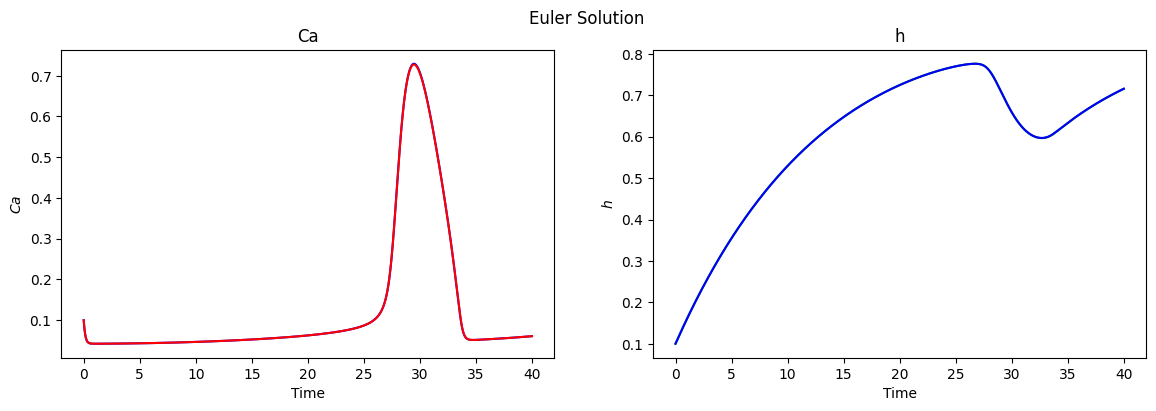

In [78]:
v2 = 0.1
a2 = 0.15
IP3 = 0.5
d5 = 0.09
k3  = 0.08

dt1 = 0.01
t1 = np.arange(0, 40, dt1)
Ca_euler1, h_euler1 = lirinzel_ns(v2, a2, IP3, d5, k3, dt1)

dt2 = 0.0001
t2 = np.arange(0, 40, dt2)
Ca_euler2, h_euler2 = lirinzel_ns(v2, a2, IP3, d5, k3, dt2)

plt.figure(figsize=(14,4))
plt.suptitle("Euler Solution")

plt.subplot(121)
plt.plot(t1, Ca_euler1, 'b')
plt.plot(t2, Ca_euler2, 'r')
plt.xlabel("Time")
plt.ylabel("$Ca$")
plt.title("Ca")

plt.subplot(122)
plt.plot(t1, h_euler1, 'g')
plt.plot(t2, h_euler2, 'b')
plt.xlabel("Time")
plt.ylabel("$h$")
plt.title("h")
plt.show()

In [79]:
class FourierFeatureLayer(nn.Module):
    def __init__(self, num_features=1):
        super(FourierFeatureLayer, self).__init__()
        self.num_features = num_features
        mean = 0.0
        std = 1.0
        size = (num_features, 1)
        self.sine_coeff = nn.Parameter(torch.normal(mean, std, size=size))   
        self.cosine_coeff = nn.Parameter(torch.normal(mean, std, size=size))

    def forward(self, t): 
        sine_feats = torch.sin(torch.matmul(t, self.sine_coeff.T))    
        cosine_feats = torch.cos(torch.matmul(t, self.cosine_coeff.T))
        feat = torch.cat([sine_feats, cosine_feats], dim=1)
        return feat

class PinnModel(nn.Module):
    def __init__(self, hidden_units, num_features, y0):
        super().__init__()
        self.y0 = y0
        self.feature = FourierFeatureLayer(num_features=num_features)
        self.layer1 = nn.Linear(in_features=2*num_features, out_features=hidden_units)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer4 = nn.Linear(in_features=hidden_units, out_features=2)

    def forward(self, x):
        out = self.layer4(self.tanh(self.layer3(self.tanh(self.layer2(self.tanh(self.layer1(self.feature(x))))))))
        scaled = self.y0 + self.tanh(x) * torch.tensor([2, 2]) * out
        return scaled

Training step: 0
Loss = 0.0003428496129345149 | Physics_loss = 0.34284958243370056 | Initial_loss = 0.0


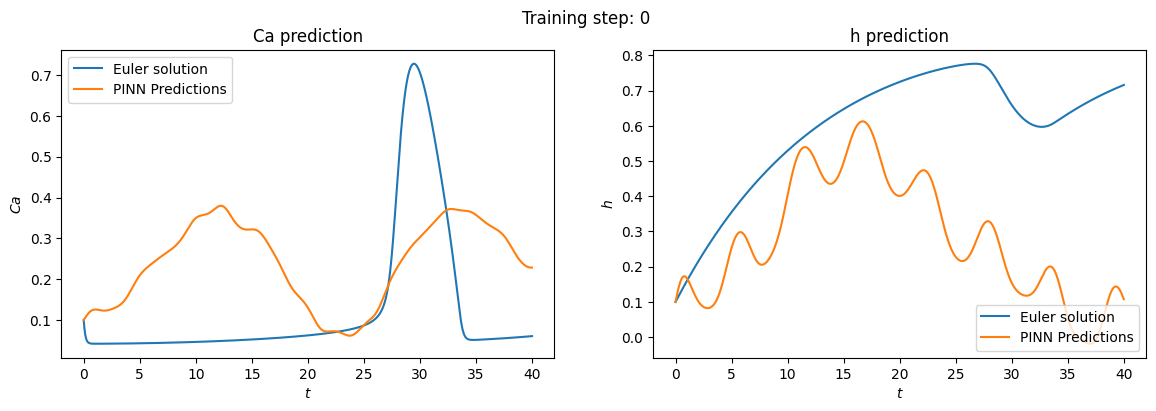

Training step: 10000
Loss = 6.251014497138385e-07 | Physics_loss = 0.0006251014419831336 | Initial_loss = 0.0


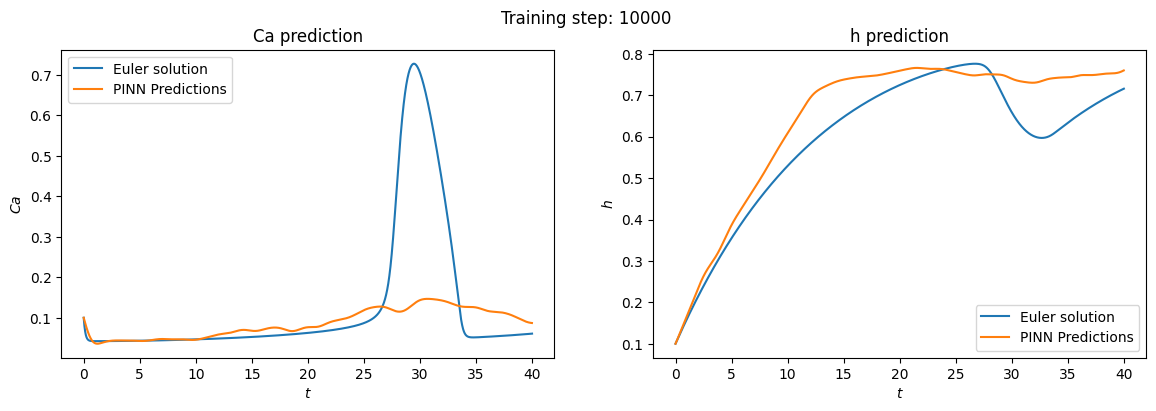

Training step: 20000
Loss = 1.3332055459613912e-07 | Physics_loss = 0.0001333205436822027 | Initial_loss = 0.0


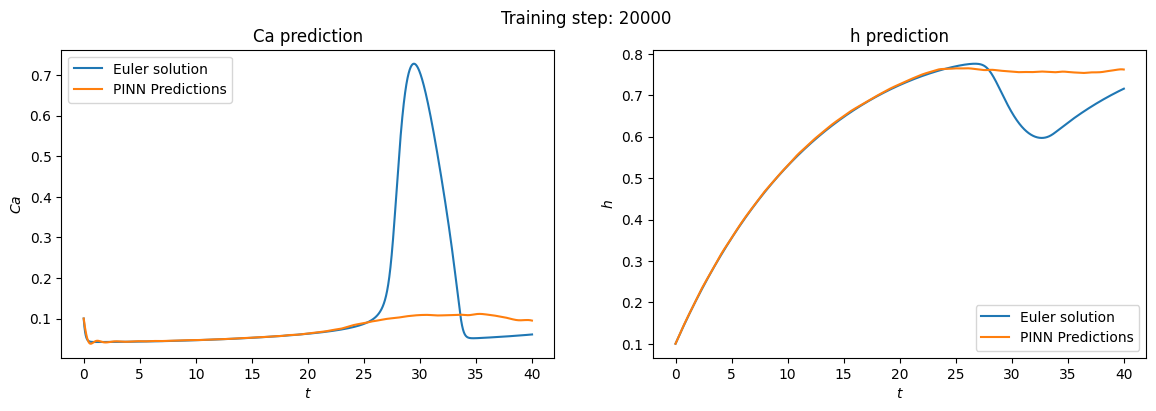

Training step: 30000
Loss = 2.4448128854714923e-08 | Physics_loss = 2.4448127078358084e-05 | Initial_loss = 0.0


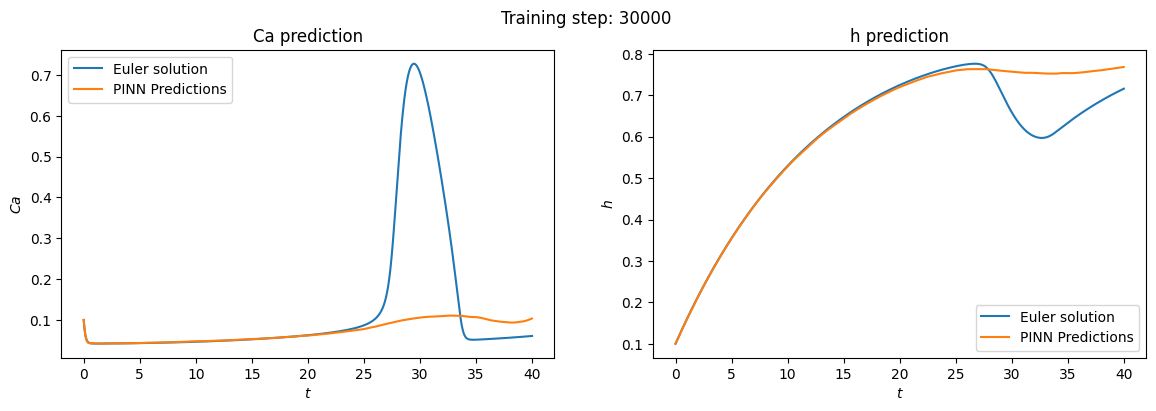

Training step: 40000
Loss = 1.357439582960751e-08 | Physics_loss = 1.3574394870374817e-05 | Initial_loss = 0.0


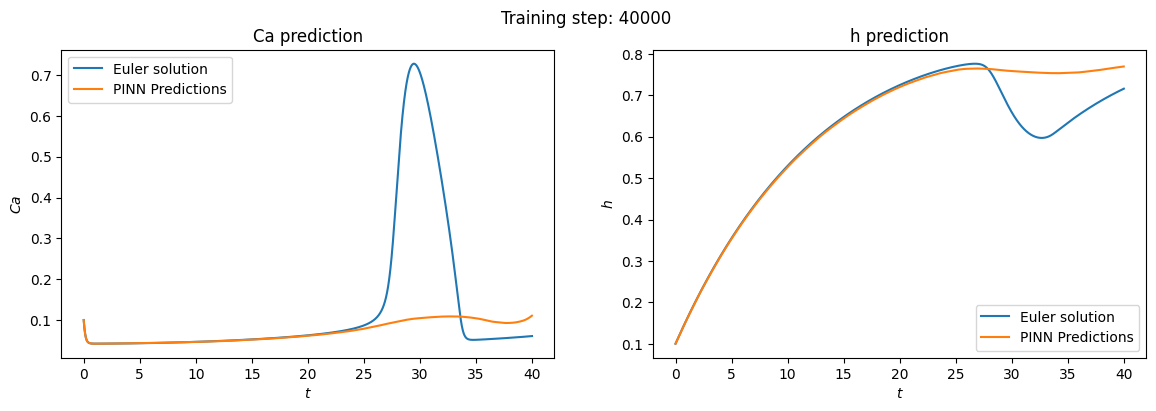

Training step: 50000
Loss = 1.1642332431449631e-08 | Physics_loss = 1.164233162853634e-05 | Initial_loss = 0.0


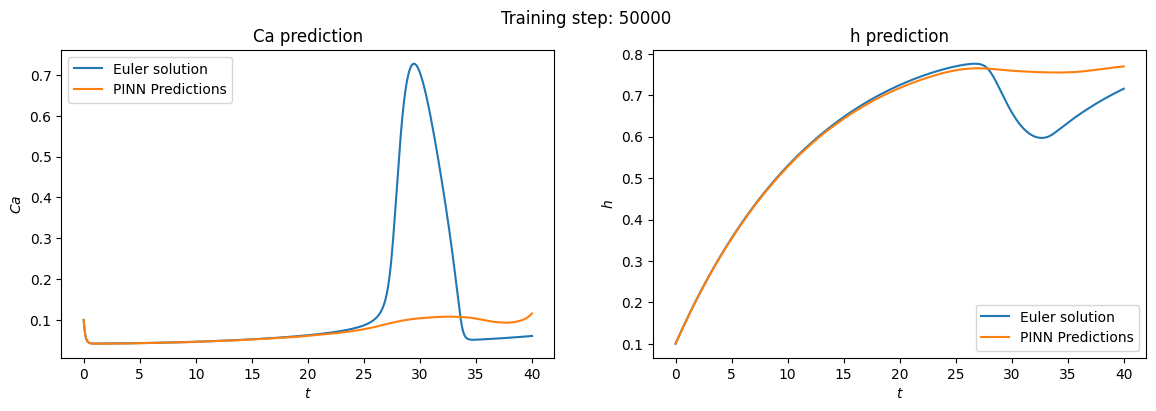

Training step: 60000
Loss = 2.701376189406801e-08 | Physics_loss = 2.7013760700356215e-05 | Initial_loss = 0.0


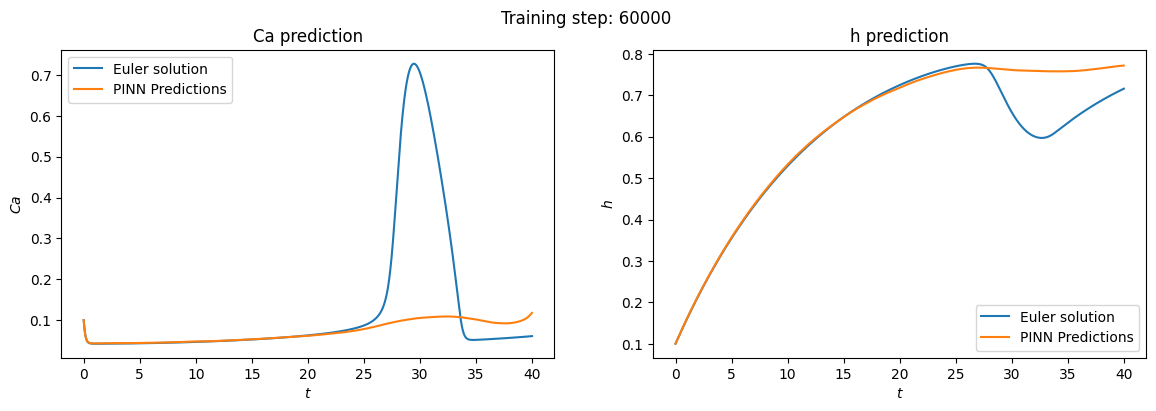

Training step: 70000
Loss = 1.374363556294611e-08 | Physics_loss = 1.3743634553975426e-05 | Initial_loss = 0.0


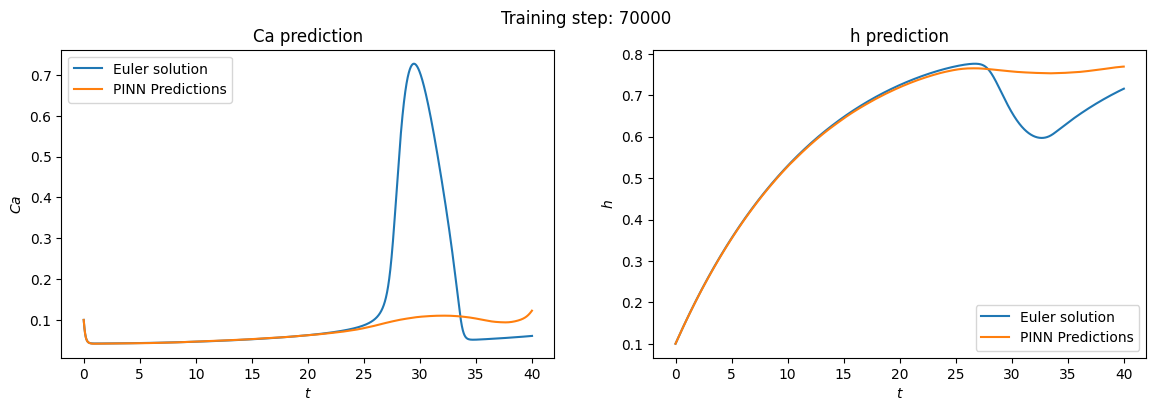

Training step: 80000
Loss = 1.020484230451757e-08 | Physics_loss = 1.0204841601080261e-05 | Initial_loss = 0.0


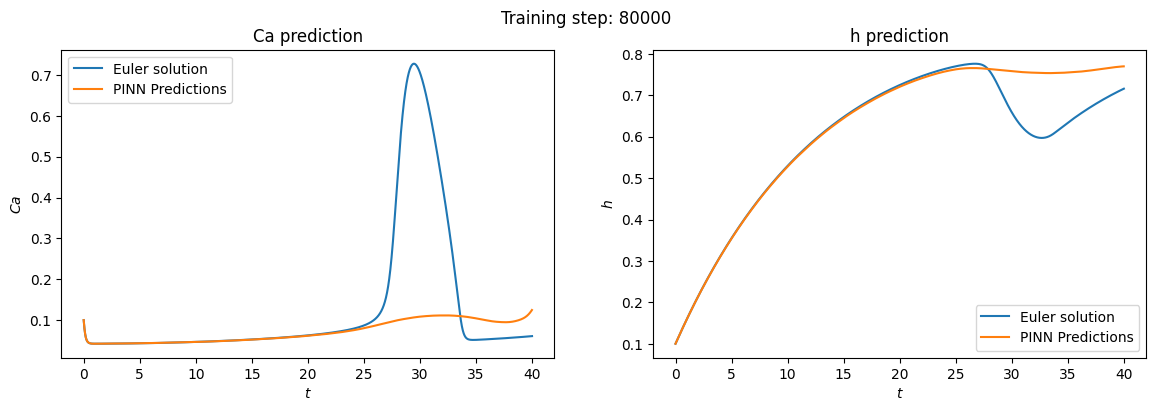

Training step: 90000
Loss = 1.007647387751831e-08 | Physics_loss = 1.0076473699882627e-05 | Initial_loss = 0.0


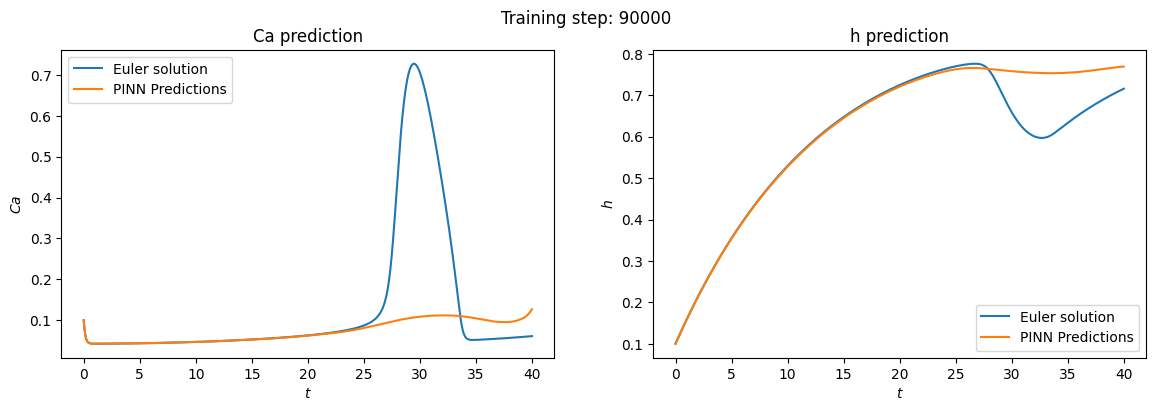

Training step: 100000
Loss = 1.2491899070710133e-08 | Physics_loss = 1.2491898814914748e-05 | Initial_loss = 0.0


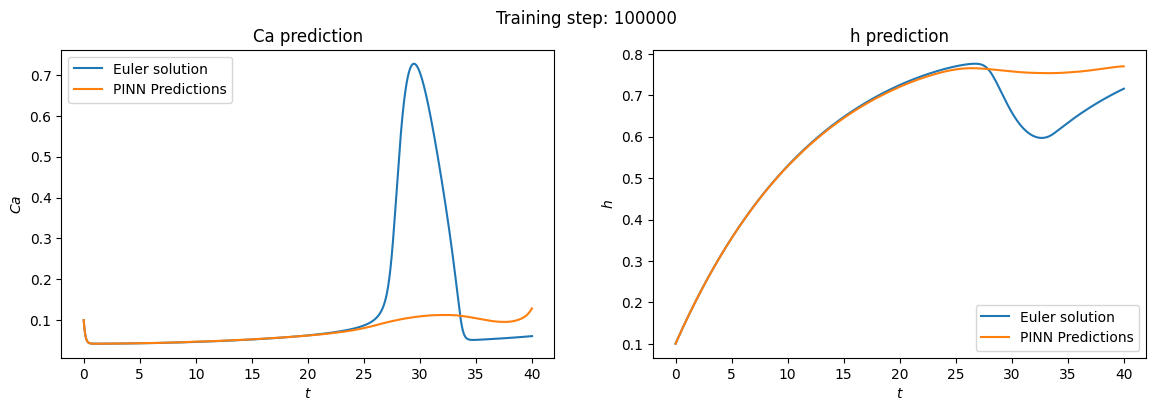

In [81]:
torch.manual_seed(42)
pinn = PinnModel(hidden_units=30, num_features=3, y0=torch.tensor([0.1, 0.1]).view(1,-1))

time = torch.arange(0, 40, 0.01).view(-1, 1)
t_initial = torch.tensor(0.0, requires_grad=True).view(-1, 1)
t_physics = torch.linspace(0, 40, 300, requires_grad=True).view(-1, 1)

optimiser = torch.optim.Adam(pinn.parameters(), lr=0.001)
epochs = 100001

c0, c1 = 2, 0.185
v1, v3 = 6, 0.9
d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
v2 = 0.1
a2 = 0.15
IP3 = 0.5
d5 = 0.09
k3  = 0.08
pinf = IP3 / (IP3 + d1)
Q2 = d2 * (IP3 + d1) / (IP3 + d3)


for i in range(epochs):

    optimiser.zero_grad()

     # Initial loss
    Ca0, h0 = pinn(t_initial)[0]
    loss1 = (torch.squeeze(Ca0) - 0.1)**2
    loss2 = (torch.squeeze(h0) - 0.1)**2

    # Physics loss 
    Ca = pinn(t_physics)[:, 0].view(-1, 1)
    Ca_temp = Ca
    dCa_dt = torch.autograd.grad(Ca, t_physics, torch.ones_like(Ca), create_graph=True, retain_graph=True)[0]

    h = pinn(t_physics)[:, 1].view(-1, 1)
    h_temp = h
    dh_dt = torch.autograd.grad(h, t_physics, torch.ones_like(h), create_graph=True, retain_graph=True)[0]

    CaER = (c0 - Ca_temp) / c1
    ninf = Ca_temp / (Ca_temp + d5)
    tauh = 1 / (a2 * (Q2 + Ca_temp))
    hinf = Q2 / (Q2 + Ca_temp)
    alphah = hinf / tauh
    betah = (1 - hinf) / tauh

    loss3 = torch.mean((dCa_dt - (c1*v1*(pinf**3)*(ninf**3)*(h_temp**3)*(CaER - Ca_temp) + c1*v2*(CaER-Ca_temp) - v3*(Ca_temp**2 / (Ca_temp**2 + k3**2))))**2)
    loss4 = torch.mean((dh_dt - (alphah*(1-h_temp) - betah*h_temp))**2)


    # Total loss
    loss = 1e-1*(loss1 + loss2) + 1e-3*(loss3 + loss4)
    loss.backward()
    optimiser.step()

    if i % 10000 == 0:
        print(f"Training step: {i}")
        print(f"Loss = {loss} | Physics_loss = {loss3 + loss4} | Initial_loss = {loss1 + loss2}")

        sol = pinn(time)
        Ca_preds = sol[:, 0].view(-1, 1)
        h_preds = sol[:, 1].view(-1, 1)

        plt.figure(figsize=(14, 4))
        plt.suptitle(f"Training step: {i}")

        plt.subplot(121)
        plt.plot(t2, Ca_euler2, label="Euler solution")
        plt.plot(time.squeeze(), Ca_preds.detach(), label="PINN Predictions")
        plt.title("Ca prediction")
        plt.xlabel("$t$")
        plt.ylabel("$Ca$")
        plt.legend(loc = "upper left")

        plt.subplot(122)
        plt.plot(t2, h_euler2, label="Euler solution")
        plt.plot(time.squeeze(), h_preds.detach(), label="PINN Predictions")
        plt.title("h prediction")
        plt.xlabel("$t$")
        plt.ylabel("$h$")
        plt.legend(loc = "lower right")
        plt.show()

In [41]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from scipy.stats import lognorm

In [42]:
def normalisation(k_Ca):
    max_Ca = np.max(k_Ca)
    return k_Ca / max_Ca

def lirinzel_ns(v2, a2, IP3, d5, k3, dt):
    c0, c1 = 2, 0.185
    v1, v3 = 6, 0.9
    d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
    time = np.arange(0, 100, dt)
    dt = dt
    Ca, h = [0.1], [0.1]  # Initialize lists

    # ODE solving
    for _ in range(1, len(time)):  # Start from index 1 to avoid index errors
        CaER = (c0 - Ca[-1]) / c1
        pinf = IP3 / (IP3 + d1)
        ninf = Ca[-1] / (Ca[-1] + d5)
        Q2 = d2 * (IP3 + d1) / (IP3 + d3)
        tauh = 1 / (a2 * (Q2 + Ca[-1]))
        hinf = Q2 / (Q2 + Ca[-1])
        alphah = hinf / tauh
        betah = (1 - hinf) / tauh
        dh = alphah * (1 - h[-1]) - betah * h[-1]
        dCa = (c1 * v1 * pinf**3 * ninf**3 * h[-1]**3 * (CaER - Ca[-1]) +
               c1 * v2 * (CaER - Ca[-1]) -
               v3 * Ca[-1]**2 / (Ca[-1]**2 + k3**2))
        
        # Append new values instead of assigning to an index
        Ca.append(Ca[-1] + dCa * dt)
        h.append(h[-1] + dh * dt)

    # Convert to NumPy array for interpolation
    Ca = np.array(Ca)
    h = np.array(h)

    return Ca, h

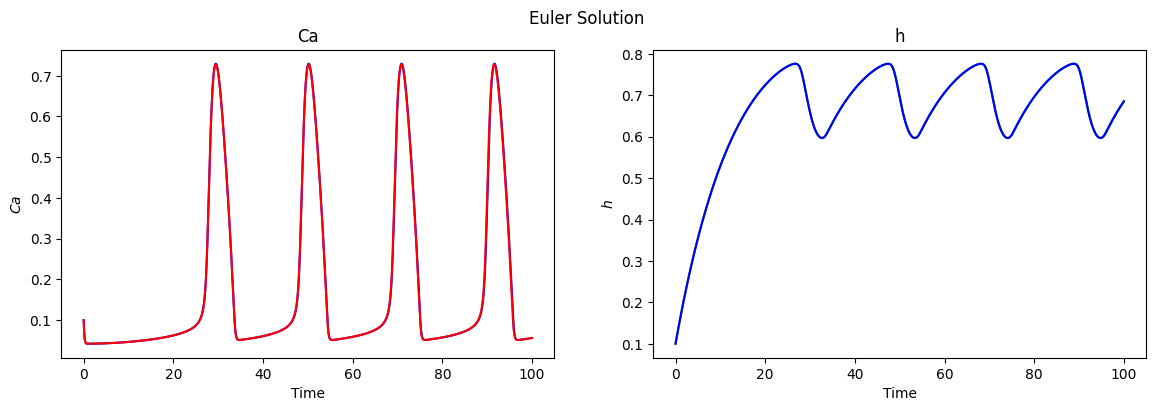

In [43]:
v2 = 0.1
a2 = 0.15
IP3 = 0.5
d5 = 0.09
k3  = 0.08

dt1 = 0.01
t1 = np.arange(0, 100, dt1)
Ca_euler1, h_euler1 = lirinzel_ns(v2, a2, IP3, d5, k3, dt1)

dt2 = 0.0001
t2 = np.arange(0, 100, dt2)
Ca_euler2, h_euler2 = lirinzel_ns(v2, a2, IP3, d5, k3, dt2)

plt.figure(figsize=(14,4))
plt.suptitle("Euler Solution")

plt.subplot(121)
plt.plot(t1, Ca_euler1, 'b')
plt.plot(t2, Ca_euler2, 'r')
plt.xlabel("Time")
plt.ylabel("$Ca$")
plt.title("Ca")

plt.subplot(122)
plt.plot(t1, h_euler1, 'g')
plt.plot(t2, h_euler2, 'b')
plt.xlabel("Time")
plt.ylabel("$h$")
plt.title("h")
plt.show()

In [44]:
class FourierFeatureLayer(nn.Module):
    def __init__(self, num_features=1):
        super(FourierFeatureLayer, self).__init__()
        self.num_features = num_features
        self.sine_coeff = nn.Parameter(torch.randn(num_features, 1))   
        self.cosine_coeff = nn.Parameter(torch.randn(num_features, 1))

    def forward(self, t): 
        sine_feats = torch.sin(torch.matmul(t, self.sine_coeff.T))    
        cosine_feats = torch.cos(torch.matmul(t, self.cosine_coeff.T))
        feat = torch.cat([sine_feats, cosine_feats], dim=1)
        return feat

class PinnModel(nn.Module):
    def __init__(self, hidden_units, num_features):
        super().__init__()
        self.feature = FourierFeatureLayer(num_features=num_features)
        self.layer1 = nn.Linear(in_features=2*num_features, out_features=hidden_units)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer4 = nn.Linear(in_features=hidden_units, out_features=2)

    def forward(self, x):
        return self.layer4(self.tanh(self.layer3(self.tanh(self.layer2(self.tanh(self.layer1(self.feature(x))))))))

In [45]:
def kl_div_loss(lhs_data, rhs_data):
    shape1, loc1, scale1 = lognorm.fit(lhs_data)
    shape2, loc2, scale2 = lognorm.fit(rhs_data)
    x1 = np.linspace(min(lhs_data), max(lhs_data), 100)
    x2 = np.linspace(min(rhs_data), max(rhs_data), 100)
    pdf1 = torch.tensor(lognorm.pdf(x1, shape1, loc=loc1, scale=scale1))
    pdf2 = torch.tensor(lognorm.pdf(x2, shape2, loc=loc2, scale=scale2))
    kl_div = nn.functional.kl_div(pdf1.log(), pdf2, reduction='batchmean')
    return kl_div

d:\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6902: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Training step: 0
Loss = 0.006544918369789366 | Physics_loss = 0.11296284943819046 | Initial_loss = 0.003960903268307447 | KL-div_loss = 60.35865192123447


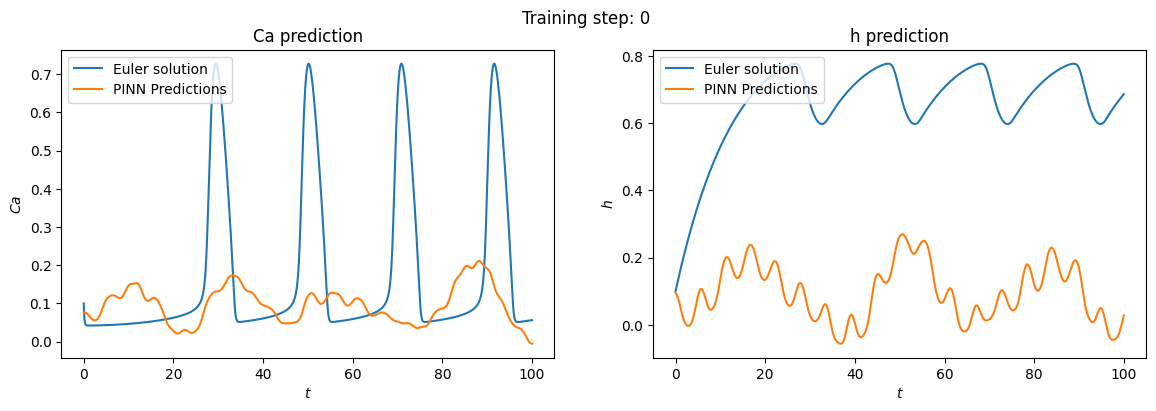

Training step: 1000
Loss = 0.005001377639138336 | Physics_loss = 0.0025186296552419662 | Initial_loss = 3.1178910120388537e-08 | KL-div_loss = 49.988558913641825


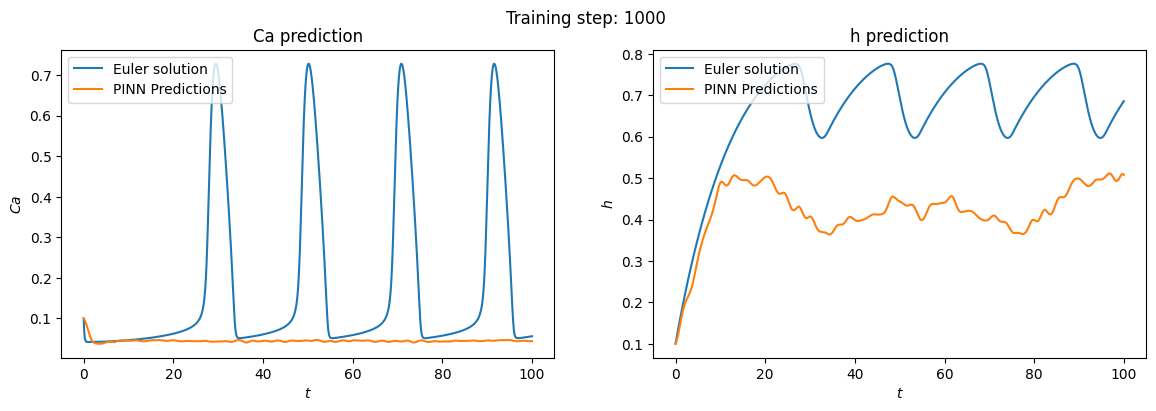

Training step: 2000
Loss = 0.0029317052209191755 | Physics_loss = 0.001175403711386025 | Initial_loss = 1.2192395537624634e-08 | KL-div_loss = 29.305285978464237


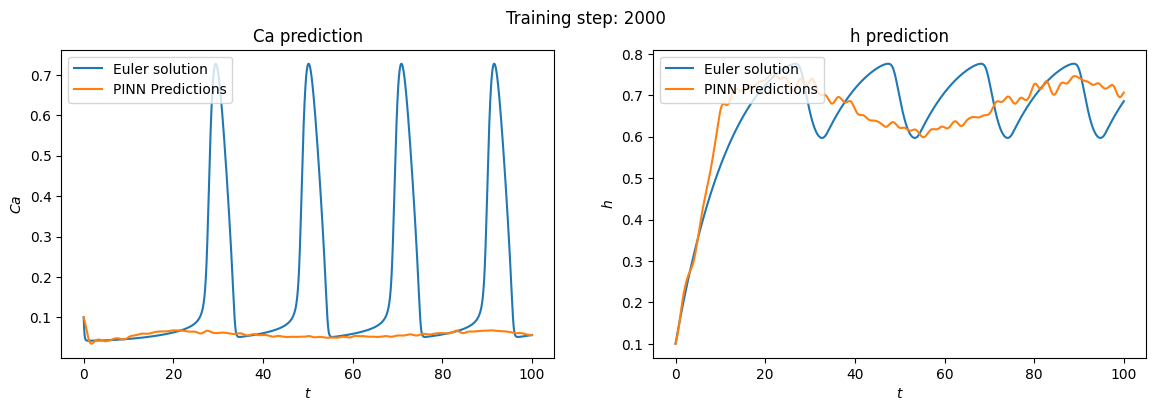

Training step: 3000
Loss = 0.0013217376733901521 | Physics_loss = 0.0008129258640110493 | Initial_loss = 2.2180337566624075e-08 | KL-div_loss = 13.209225294413674


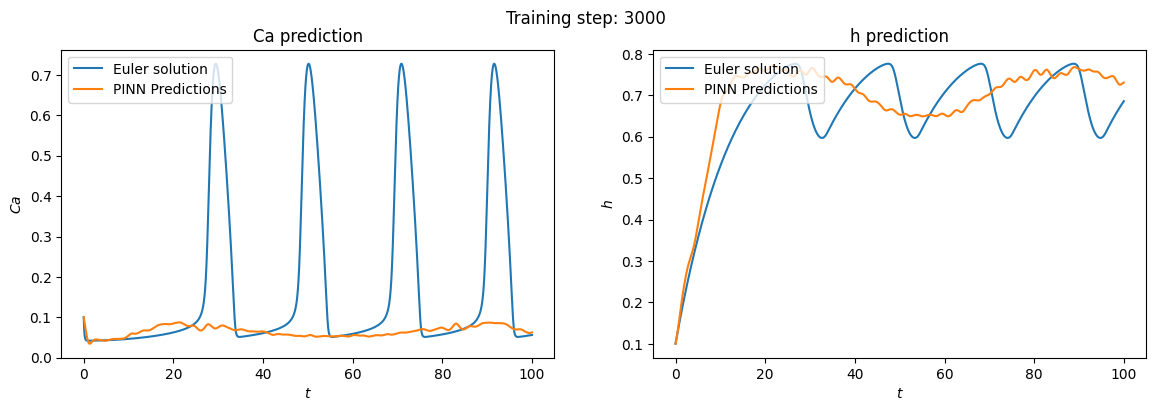

KeyboardInterrupt: 

In [46]:
torch.manual_seed(42)
pinn = PinnModel(hidden_units=30, num_features=3)

time = torch.arange(0, 100, 0.01).view(-1, 1)
t_initial = torch.tensor(0.0, requires_grad=True).view(-1, 1)
t_physics = torch.linspace(0, 100, 200, requires_grad=True).view(-1, 1)

lam1, lam2, lam3 = 1e-1, 1e-3, 1e-4
optimiser = torch.optim.Adam(pinn.parameters(), lr=0.001)
epochs = 10001

c0, c1 = 2, 0.185
v1, v3 = 6, 0.9
d1, d2, d3, Nd = 0.13, 1.049, 0.9434, 2
v2 = 0.1
a2 = 0.15
IP3 = 0.5
d5 = 0.09
k3  = 0.08
pinf = IP3 / (IP3 + d1)
Q2 = d2 * (IP3 + d1) / (IP3 + d3)


for i in range(epochs):

    optimiser.zero_grad()

    # Initial loss
    Ca0, h0 = pinn(t_initial)[0]
    loss1 = (torch.squeeze(Ca0) - 0.1)**2
    loss2 = (torch.squeeze(h0) - 0.1)**2

    # Physics loss 
    Ca = pinn(t_physics)[:, 0].view(-1, 1)
    Ca_temp = Ca
    dCa_dt = torch.autograd.grad(Ca, t_physics, torch.ones_like(Ca), create_graph=True, retain_graph=True)[0]

    h = pinn(t_physics)[:, 1].view(-1, 1)
    h_temp = h
    dh_dt = torch.autograd.grad(h, t_physics, torch.ones_like(h), create_graph=True, retain_graph=True)[0]

    CaER = (c0 - Ca_temp) / c1
    ninf = Ca_temp / (Ca_temp + d5)
    tauh = 1 / (a2 * (Q2 + Ca_temp))
    hinf = Q2 / (Q2 + Ca_temp)
    alphah = hinf / tauh
    betah = (1 - hinf) / tauh

    rhs1 = c1*v1*(pinf**3)*(ninf**3)*(h_temp**3)*(CaER - Ca_temp) + c1*v2*(CaER-Ca_temp) - v3*(Ca_temp**2 / (Ca_temp**2 + k3**2))
    rhs2 = alphah*(1-h_temp) - betah*h_temp

    loss3 = torch.mean((dCa_dt - rhs1)**2)
    loss4 = torch.mean((dh_dt - rhs2)**2)

    # KL-div loss
    loss5 = kl_div_loss(dCa_dt.detach().numpy(), rhs1.detach().numpy())
    loss6 = kl_div_loss(dh_dt.detach().numpy(), rhs2.detach().numpy())
    

    # Total loss
    loss = lam1*(loss1 + loss2) + lam2*(loss3 + loss4) + lam3*(loss5 + loss6)
    loss.backward()
    optimiser.step()

    if i % 1000 == 0:
        print(f"Training step: {i}")
        print(f"Loss = {loss} | Physics_loss = {loss3 + loss4} | Initial_loss = {loss1 + loss2} | KL-div_loss = {loss5 + loss6}")

        sol = pinn(time)
        Ca_preds = sol[:, 0].view(-1, 1)
        h_preds = sol[:, 1].view(-1, 1)

        plt.figure(figsize=(14, 4))
        plt.suptitle(f"Training step: {i}")

        plt.subplot(121)
        plt.plot(t2, Ca_euler2, label="Euler solution")
        plt.plot(time.squeeze(), Ca_preds.detach(), label="PINN Predictions")
        plt.title("Ca prediction")
        plt.xlabel("$t$")
        plt.ylabel("$Ca$")
        plt.legend(loc="upper left")

        plt.subplot(122)
        plt.plot(t2, h_euler2, label="Euler solution")
        plt.plot(time.squeeze(), h_preds.detach(), label="PINN Predictions")
        plt.title("h prediction")
        plt.xlabel("$t$")
        plt.ylabel("$h$")
        plt.legend(loc="upper left")
        plt.show()